In [3]:
import openmc
%matplotlib inline
openmc.config['cross_sections']='/mnt/e/OpenMC_Projects/endfb-viii.0-hdf5/cross_sections.xml'

In [4]:
#materials
uranium_40 = openmc.Material(name='enrich4.0')
uranium_40.add_element('U', 1.0, enrichment=4.0)
uranium_40.add_element('O', 2.0)
uranium_40.set_density('g/cc', 10.4)

uranium_33 = openmc.Material(name='enrich3.3')
uranium_33.add_element('U', 1.0, enrichment=3.3)
uranium_33.add_element('O', 2.0)
uranium_33.set_density('g/cc', 10.4)

uranium_30 = openmc.Material(name='enrich3.0')
uranium_30.add_element('U', 1.0, enrichment=3.0)
uranium_30.add_element('O', 2.0)
uranium_30.set_density('g/cc', 10.4)

uranium_22 = openmc.Material(name='enrich2.2')
uranium_22.add_element('U', 1.0, enrichment=2.2)
uranium_22.add_element('O', 2.0)
uranium_22.set_density('g/cc', 10.4)

uranium_13 = openmc.Material(name='enrich1.3')
uranium_13.add_element('U', 1.0, enrichment=1.3)
uranium_13.add_element('O', 2.0)
uranium_13.set_density('g/cc', 10.4)

blanket_fuel_material = openmc.Material(name='depleted uranium')
blanket_fuel_material.add_element('U', 1.0, enrichment=0.3)
blanket_fuel_material.add_element('O', 2.0)
blanket_fuel_material.set_density('g/cc', 10.4)

Gd2O3 = openmc.Material()
Gd2O3.add_element('Gd', 2.0)
Gd2O3.add_element('O', 3.0)
Gd2O3.set_density('g/cm3', 7.41)

u235 = openmc.Material(name='U235')
u235.add_nuclide('U235', 1.0)
u235.set_density('g/cm3', 10.0)

u238 = openmc.Material(name='U238')
u238.add_nuclide('U238', 1.0)
u238.set_density('g/cm3', 10.0)

pu238 = openmc.Material(name='Pu238')
pu238.add_nuclide('Pu238', 1.0)
pu238.set_density('g/cm3', 10.0)

pu239 = openmc.Material(name='U235')
pu239.add_nuclide('Pu239', 1.0)
pu239.set_density('g/cm3', 10.0)

pu240 = openmc.Material(name='Pu240')
pu240.add_nuclide('Pu240', 1.0)
pu240.set_density('g/cm3', 10.0)

pu241 = openmc.Material(name='Pu241')
pu241.add_nuclide('Pu241', 1.0)
pu241.set_density('g/cm3', 10.0)

pu242 = openmc.Material(name='Pu242')
pu242.add_nuclide('Pu242', 1.0)
pu242.set_density('g/cm3', 10.0)

am241 = openmc.Material(name='Am241')
am241.add_nuclide('Am241', 1.0)
am241.set_density('g/cm3', 10.0)

o16 = openmc.Material(name='O16')
o16.add_nuclide('O16', 1.0)
o16.set_density('g/cm3', 10.0)

cladding_material = openmc.Material(name="stainless steel 316L")
cladding_material.add_element('Fe',0.66,'wo')
cladding_material.add_element('Cr', 0.17,'wo')
cladding_material.add_element('Ni', 0.12,'wo')
cladding_material.add_element('Mo',0.02,'wo')
cladding_material.add_element('Mn',0.02,'wo')
cladding_material.add_element('Si',0.01,'wo')
cladding_material.set_density('g/cm3',8.0)

border_material = openmc.Material()
border_material.add_element('Fe',0.66,'wo')
border_material.add_element('Cr', 0.17,'wo')
border_material.add_element('Ni', 0.12,'wo')
border_material.add_element('Mo',0.02,'wo')
border_material.add_element('Mn',0.02,'wo')
border_material.add_element('Si',0.01,'wo')
border_material.set_density('g/cm3',8.0)

fast_coolant_material = openmc.Material(name='lead Bismuth Eutectic')
fast_coolant_material.add_element('Pb', 0.75)
fast_coolant_material.add_element('Bi', 0.25)
fast_coolant_material.set_density('g/cm3', 10.24)

gap_material = openmc.Material(name='helium')
gap_material.add_element('He', 1.0)
gap_material.set_density('g/cm3', 0.13)

graphite_material = openmc.Material(name='graphite')
graphite_material.set_density('g/cm3', 1.9)
graphite_material.add_element('C', 1.0)
graphite_material.add_s_alpha_beta('c_Graphite')

reflector_material = openmc.Material()
reflector_material.add_nuclide('Be9', 1.0)
reflector_material.add_nuclide('O16', 1.0)
reflector_material.set_density('g/cm3', 2.9)

control_material = openmc.Material()
control_material.add_nuclide('B10', 0.80)
control_material.add_nuclide('B11', 3.20)
control_material.add_nuclide('C12', 1.0)
control_material.set_density('g/cm3', 2.52)

In [5]:
#mixtures
inner_mox_material = openmc.Material.mix_materials(
    [u235, u238, pu238, pu239, pu240, pu241, pu242, am241, o16],
    [0.0019, 0.7509, 0.0046, 0.0612, 0.0383, 0.0106, 0.0134, 0.001, 0.1181],
    'wo')
outer_mox_material = openmc.Material.mix_materials(
    [u235, u238, pu238, pu239, pu240, pu241, pu242, am241, o16],
    [0.0018, 0.73, 0.0053, 0.0711, 0.0445, 0.0124, 0.0156, 0.0017, 0.1176],
    'wo')

In [6]:
mat_colors = {inner_mox_material:'green',fast_coolant_material:'yellow',cladding_material:'black',outer_mox_material:'blue'}

In [7]:
# materials file xml
materials_file = openmc.Materials([uranium_40, uranium_33, uranium_30, uranium_22, uranium_13, blanket_fuel_material, Gd2O3, cladding_material, border_material,
fast_coolant_material, gap_material, graphite_material, reflector_material, control_material,inner_mox_material,outer_mox_material])
materials_file.export_to_xml()

In [8]:
#filling empty space
coolant_cell = openmc.Cell(fill=fast_coolant_material)
coolant_u = openmc.Universe(cells=(coolant_cell,))

In [9]:
fuel_bottom = openmc.ZPlane(surface_id=300, z0=-75)
fuel_top= openmc.ZPlane(surface_id=301, z0=75)

#reflector_z0 = openmc.ZPlane(surface_id=303, z0=-95)
#reflector_z1 = openmc.ZPlane(surface_id=304, z0=95)

breeder_barrier_bottom= openmc.ZPlane(surface_id=305, z0=-85, boundary_type='vacuum')
breeder_barrier_top= openmc.ZPlane(surface_id=306, z0=85, boundary_type='vacuum')

<Axes: xlabel='x [cm]', ylabel='y [cm]'>

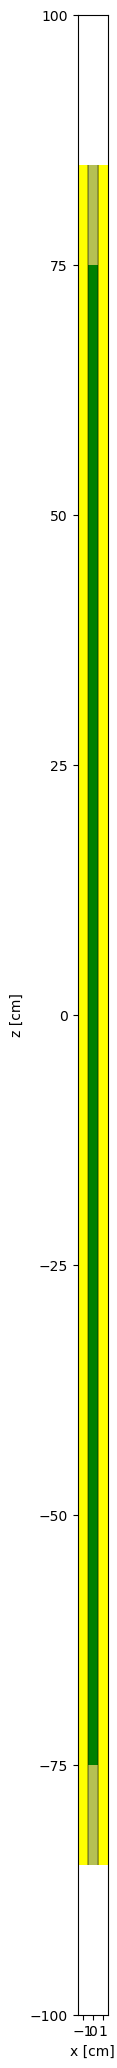

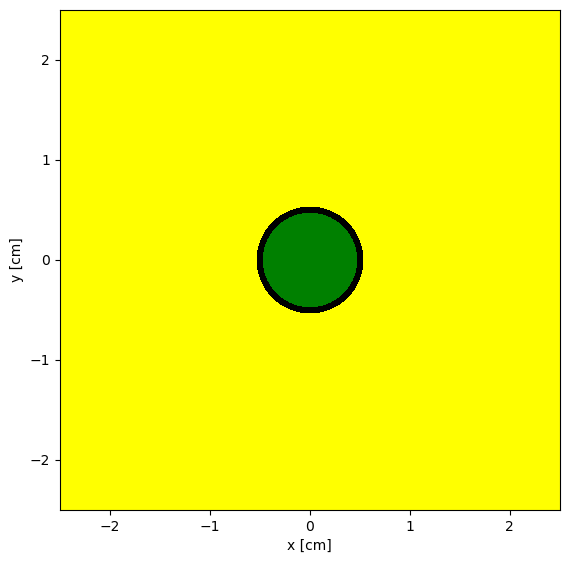

In [10]:
#inner fast fuel definitions

fuel_or1 = openmc.ZCylinder(r=0.472)
clad_ir1 = openmc.ZCylinder(r=0.487)
clad_or1 = openmc.ZCylinder(r=0.534)

fuel_region1 = -fuel_or1 & -fuel_top & +fuel_bottom
gap_region1  = +fuel_or1 & -clad_ir1 & -breeder_barrier_top & +breeder_barrier_bottom
clad_region1 = +fuel_or1 & -clad_or1 & -breeder_barrier_top & +breeder_barrier_bottom
moderator_region1 = +clad_or1 & -breeder_barrier_top & +breeder_barrier_bottom
top_breed_region1= -fuel_or1 & +fuel_top & -breeder_barrier_top
bottom_breed_region1= -fuel_or1 & -fuel_bottom & +breeder_barrier_bottom

fuel_cell1 = openmc.Cell(cell_id=400, fill=inner_mox_material, region=fuel_region1)
clad_cell1 = openmc.Cell(cell_id=401, fill=cladding_material, region=clad_region1)
mod_cell1 = openmc.Cell(cell_id=402, fill=fast_coolant_material, region=moderator_region1)
gap_cell1   = openmc.Cell(cell_id=404, fill=gap_material, region=gap_region1)
top_breed_cell1 = openmc.Cell(cell_id=405, fill=blanket_fuel_material, region=top_breed_region1)
bottom_breed_cell1 = openmc.Cell(cell_id=406, fill=blanket_fuel_material, region=bottom_breed_region1)

in_fast_fuel = openmc.Universe(cells=[fuel_cell1, clad_cell1, mod_cell1,gap_cell1,top_breed_cell1,bottom_breed_cell1])

in_fast_fuel.plot(origin = (0,0,0), pixels=(2000, 2000), width = (3.,200), color_by = 'material',colors=mat_colors, basis='xz')
in_fast_fuel.plot(origin = (0,0,0), pixels=(500, 500), width = (5,5), color_by = 'material',colors=mat_colors, basis='xy')

In [11]:
#Blanket fuel Definitions

fuel_or2 = openmc.ZCylinder(r=0.472)
clad_ir2 = openmc.ZCylinder(r=0.487)
clad_or2 = openmc.ZCylinder(r=0.534)

fuel_region2 = -fuel_or2 & -breeder_barrier_top & +breeder_barrier_bottom
gap_region2  = +fuel_or2 & -clad_ir2 & -breeder_barrier_top & +breeder_barrier_bottom
clad_region2 = +fuel_or2 & -clad_or2 & -breeder_barrier_top & +breeder_barrier_bottom
moderator_region2 = +clad_or2 & -breeder_barrier_top & +breeder_barrier_bottom

fuel_cell2 = openmc.Cell(cell_id=500, fill=blanket_fuel_material, region=fuel_region2)
clad_cell2 = openmc.Cell(cell_id=501, fill=cladding_material, region=clad_region2)
mod_cell2 = openmc.Cell(cell_id=502, fill=fast_coolant_material, region=moderator_region2)
gap_cell2   = openmc.Cell(cell_id=504, fill=gap_material, region=gap_region2)

blanket_fuel = openmc.Universe(cells=[fuel_cell2, clad_cell2, mod_cell2,gap_cell2])
#blanket_fuel.plot(origin = (0,0,0), pixels=(500, 500), width = (3.,200), color_by = 'material',colors={blanket_fuel_material:'green'}, basis='xz')

In [12]:
#fast region control rod definitions

fuel_or4 = openmc.ZCylinder(r=0.472)
clad_ir4 = openmc.ZCylinder(r=0.487)
clad_or4 = openmc.ZCylinder(r=0.534)

fuel_region4 = -fuel_or4 & -breeder_barrier_top & +breeder_barrier_bottom
gap_region4  = +fuel_or4 & -clad_ir4 & -breeder_barrier_top & +breeder_barrier_bottom
clad_region4 = +fuel_or4 & -clad_or4 & -breeder_barrier_top & +breeder_barrier_bottom
moderator_region4 = +clad_or4 & -breeder_barrier_top & +breeder_barrier_bottom

fuel_cell4 = openmc.Cell(cell_id=700 , fill=control_material, region=fuel_region4)
clad_cell4 = openmc.Cell(cell_id=701, fill=cladding_material, region=clad_region4)
mod_cell4 = openmc.Cell(cell_id=702, fill=fast_coolant_material, region=moderator_region4)
gap_cell4   = openmc.Cell(cell_id=704, fill=control_material, region=gap_region4)

f_control_rod= openmc.Universe(cells=[fuel_cell4, clad_cell4, mod_cell4,gap_cell4])
#f_control_rod.plot(origin = (0,0,0), pixels=(500, 500), width = (3.,3.), color_by = 'material')

In [13]:
#outer fast fuel definitions (high enrichment)

fuel_or6 = openmc.ZCylinder(r=0.472)
clad_ir6 = openmc.ZCylinder(r=0.487)
clad_or6 = openmc.ZCylinder(r=0.534)

fuel_region6 = -fuel_or6 & -fuel_top & +fuel_bottom
gap_region6 = +fuel_or6 & -clad_ir6 & -breeder_barrier_top & +breeder_barrier_bottom
clad_region6 = +fuel_or6 & -clad_or6 & -breeder_barrier_top & +breeder_barrier_bottom
moderator_region6 = +clad_or6 & -breeder_barrier_top & +breeder_barrier_bottom
top_breed_region6= -fuel_or6 & +fuel_top & -breeder_barrier_top
bottom_breed_region6= -fuel_or6 & -fuel_bottom & +breeder_barrier_bottom

fuel_cell6 = openmc.Cell(cell_id=900, fill=outer_mox_material, region=fuel_region6)
clad_cell6 = openmc.Cell(cell_id=901, fill=cladding_material, region=clad_region6)
mod_cell6 = openmc.Cell(cell_id=902, fill=fast_coolant_material, region=moderator_region6)
gap_cell6  = openmc.Cell(cell_id=904, fill=gap_material, region=gap_region6)
top_breed_cell6 = openmc.Cell(cell_id=905, fill=blanket_fuel_material, region=top_breed_region1)
bottom_breed_cell6 = openmc.Cell(cell_id=906, fill=blanket_fuel_material, region=bottom_breed_region1)

out_fast_fuel = openmc.Universe(cells=[fuel_cell6, clad_cell6, mod_cell6,gap_cell6,top_breed_cell6,bottom_breed_cell6])
#out_fast_fuel.plot(origin = (0,0,0), pixels=(500, 500), width = (10.,200), color_by = 'material',colors={outer_mox_material:'green'}, basis='xz')

In [14]:
#Fast Blank assembly

fast_blank = openmc.model.hexagonal_prism(edge_length=12.3, orientation='x')
fast_blank_cell = openmc.Cell(fill=fast_coolant_material, region= fast_blank & -breeder_barrier_top & +breeder_barrier_bottom)
fast_blank_cell_out = openmc.Cell(fill=fast_coolant_material, region= ~fast_blank & -breeder_barrier_top & +breeder_barrier_bottom)
fast_blank_u = openmc.Universe(cells=[fast_blank_cell,fast_blank_cell_out])

/home/hridoy/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


In [15]:
#inner fast fuel assembly

infast_ass = openmc.HexLattice(name='inner fast assembly')
infast_ass.center = (0., 0.)
infast_ass.pitch = (1.294,)
infast_ass.orientation = 'x'
infast_ass.outer = coolant_u

inring9= [in_fast_fuel]*48
inring8= [in_fast_fuel]*42
inring7= [in_fast_fuel]*36
inring6= [in_fast_fuel]*30
inring5= [in_fast_fuel]*24
inring4= [in_fast_fuel]*18
inring3= [in_fast_fuel]*12
inring2= [in_fast_fuel]*6
inring1= [in_fast_fuel]
infast_ass.universes=[inring9,inring8,inring7,inring6,inring5,inring4,inring3,inring2,inring1]

infast_ass_boundary = openmc.model.hexagonal_prism(edge_length=12.3, orientation='x')
infast_ass_cell = openmc.Cell(fill=infast_ass, region= infast_ass_boundary & -breeder_barrier_top & +breeder_barrier_bottom)
infast_ass_surrounding = openmc.Cell(fill=fast_coolant_material, region= ~infast_ass_boundary & -breeder_barrier_top & +breeder_barrier_bottom)

infast_ass_u= openmc.Universe(cells=[infast_ass_cell,infast_ass_surrounding])
#img1 = infast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (25.,200), color_by = 'material',colors={inner_mox_material:'green'}, basis='xz')
#img2 = infast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (25.,25), color_by = 'material',colors={inner_mox_material:'green'})

In [16]:
#outer fast fuel assembly

outerfast_ass = openmc.HexLattice(name='outer fast assembly')
outerfast_ass.center = (0., 0.)
outerfast_ass.pitch = (1.294,)
outerfast_ass.orientation = 'x'
outerfast_ass.outer = coolant_u

outring9= [out_fast_fuel]*48
outring8= [out_fast_fuel]*42
outring7= [out_fast_fuel]*36
outring6= [out_fast_fuel]*30
outring5= [out_fast_fuel]*24
outring4= [out_fast_fuel]*18
outring3= [out_fast_fuel]*12
outring2= [out_fast_fuel]*6
outring1= [out_fast_fuel]
outerfast_ass.universes=[outring9,outring8,outring7,outring6,outring5,outring4,outring3,outring2,outring1]

outerfast_ass_boundary = openmc.model.hexagonal_prism(edge_length=12.3, orientation='x')
outerfast_ass_cell = openmc.Cell(fill=outerfast_ass, region= outerfast_ass_boundary & -breeder_barrier_top & +breeder_barrier_bottom)
outerfast_ass_surrounding = openmc.Cell(fill=fast_coolant_material, region= ~outerfast_ass_boundary & -breeder_barrier_top & +breeder_barrier_bottom)

outerfast_ass_u= openmc.Universe(cells=[outerfast_ass_cell,outerfast_ass_surrounding])
#img1 = outerfast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (25.,200), color_by = 'material',colors={outer_mox_material:'green'}, basis='xz')
#img2 = outerfast_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (25.,25), color_by = 'material',colors={outer_mox_material:'green'})

In [17]:
# blanket fuel assembly
blanket_lat = openmc.HexLattice(name='outer assembly')
blanket_lat.center = (0., 0.)
blanket_lat.pitch = (21.08/17,)
blanket_lat.orientation = 'x'
blanket_lat.outer = coolant_u

blnkone = [blanket_fuel]*48
blnktwo = [blanket_fuel]*42
blnkthree = [blanket_fuel]*36
blnkfour = [blanket_fuel]*30
blnkfive = [blanket_fuel]*24
blnksix = [blanket_fuel]*18
blnkseven = [blanket_fuel]*12
blnkeight = [blanket_fuel]*6
blnknine = [blanket_fuel]*1
blanket_lat.universes = [blnkone,blnktwo,blnkthree,blnkfour,blnkfive,blnksix,blnkseven,blnkeight,blnknine]


blanket_out_surface = openmc.model.hexagonal_prism(edge_length=12.1705, orientation='x')

blanket_out_assembly = openmc.Cell(fill=blanket_lat, region=blanket_out_surface & -breeder_barrier_top & +breeder_barrier_bottom)

blanket_out_out_assembly  = openmc.Cell(fill=fast_coolant_material,  region=~blanket_out_surface & -breeder_barrier_top & +breeder_barrier_bottom)

blanket_ass_u = openmc.Universe(cells=[blanket_out_assembly, blanket_out_out_assembly])
#img1 = blanket_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (25.,200), color_by = 'material', basis='xz')
#img2 = blanket_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (25.,25), color_by = 'material')

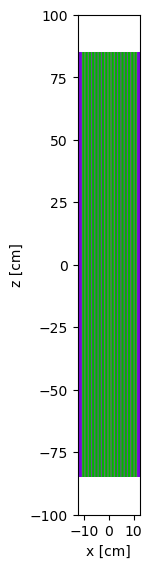

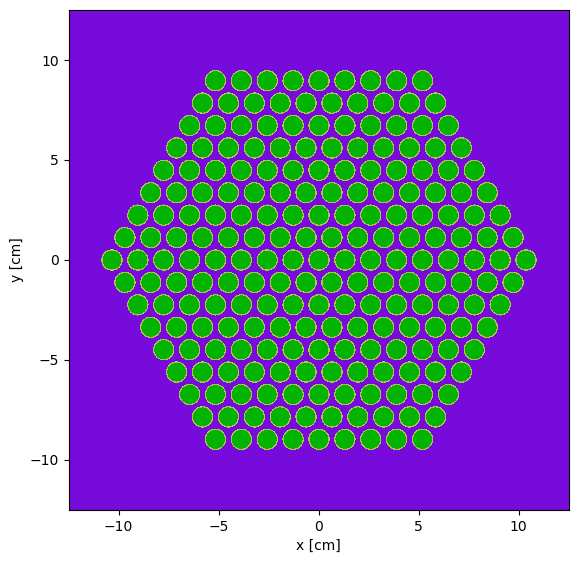

In [18]:
#2nd version fast control

fastcontrol_lat = openmc.HexLattice(name='fast control 2nd')
fastcontrol_lat.center = (0., 0.)
fastcontrol_lat.pitch = (1.294,)
fastcontrol_lat.orientation = 'x'
fastcontrol_lat.outer = coolant_u

fcring9= [f_control_rod]*48
fcring8= [f_control_rod]*42
fcring7= [f_control_rod]*36
fcring6= [f_control_rod]*30
fcring5= [f_control_rod]*24
fcring4= [f_control_rod]*18
fcring3= [f_control_rod]*12
fcring2= [f_control_rod]*6
fcring1= [f_control_rod]
fastcontrol_lat.universes=[fcring9,fcring8,fcring7,fcring6,fcring5,fcring4,fcring3,fcring2,fcring1]

fastcontrol_boundary = openmc.model.hexagonal_prism(edge_length=12.3, orientation = 'x')
fastcontrol_cell = openmc.Cell(fill=fastcontrol_lat, region= fastcontrol_boundary & -breeder_barrier_top & +breeder_barrier_bottom)
fastcontrol_surrounding = openmc.Cell(fill=fast_coolant_material, region= ~fastcontrol_boundary & -breeder_barrier_top & +breeder_barrier_bottom)

fastcontrol_ass_u= openmc.Universe(cells=[fastcontrol_cell,fastcontrol_surrounding])
img1 = fastcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (25.,200), color_by = 'material', basis='xz')
img2 = fastcontrol_ass_u.plot(origin = (0,0,0), pixels=(500, 500), width = (25.,25), color_by = 'material')

/home/hridoy/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


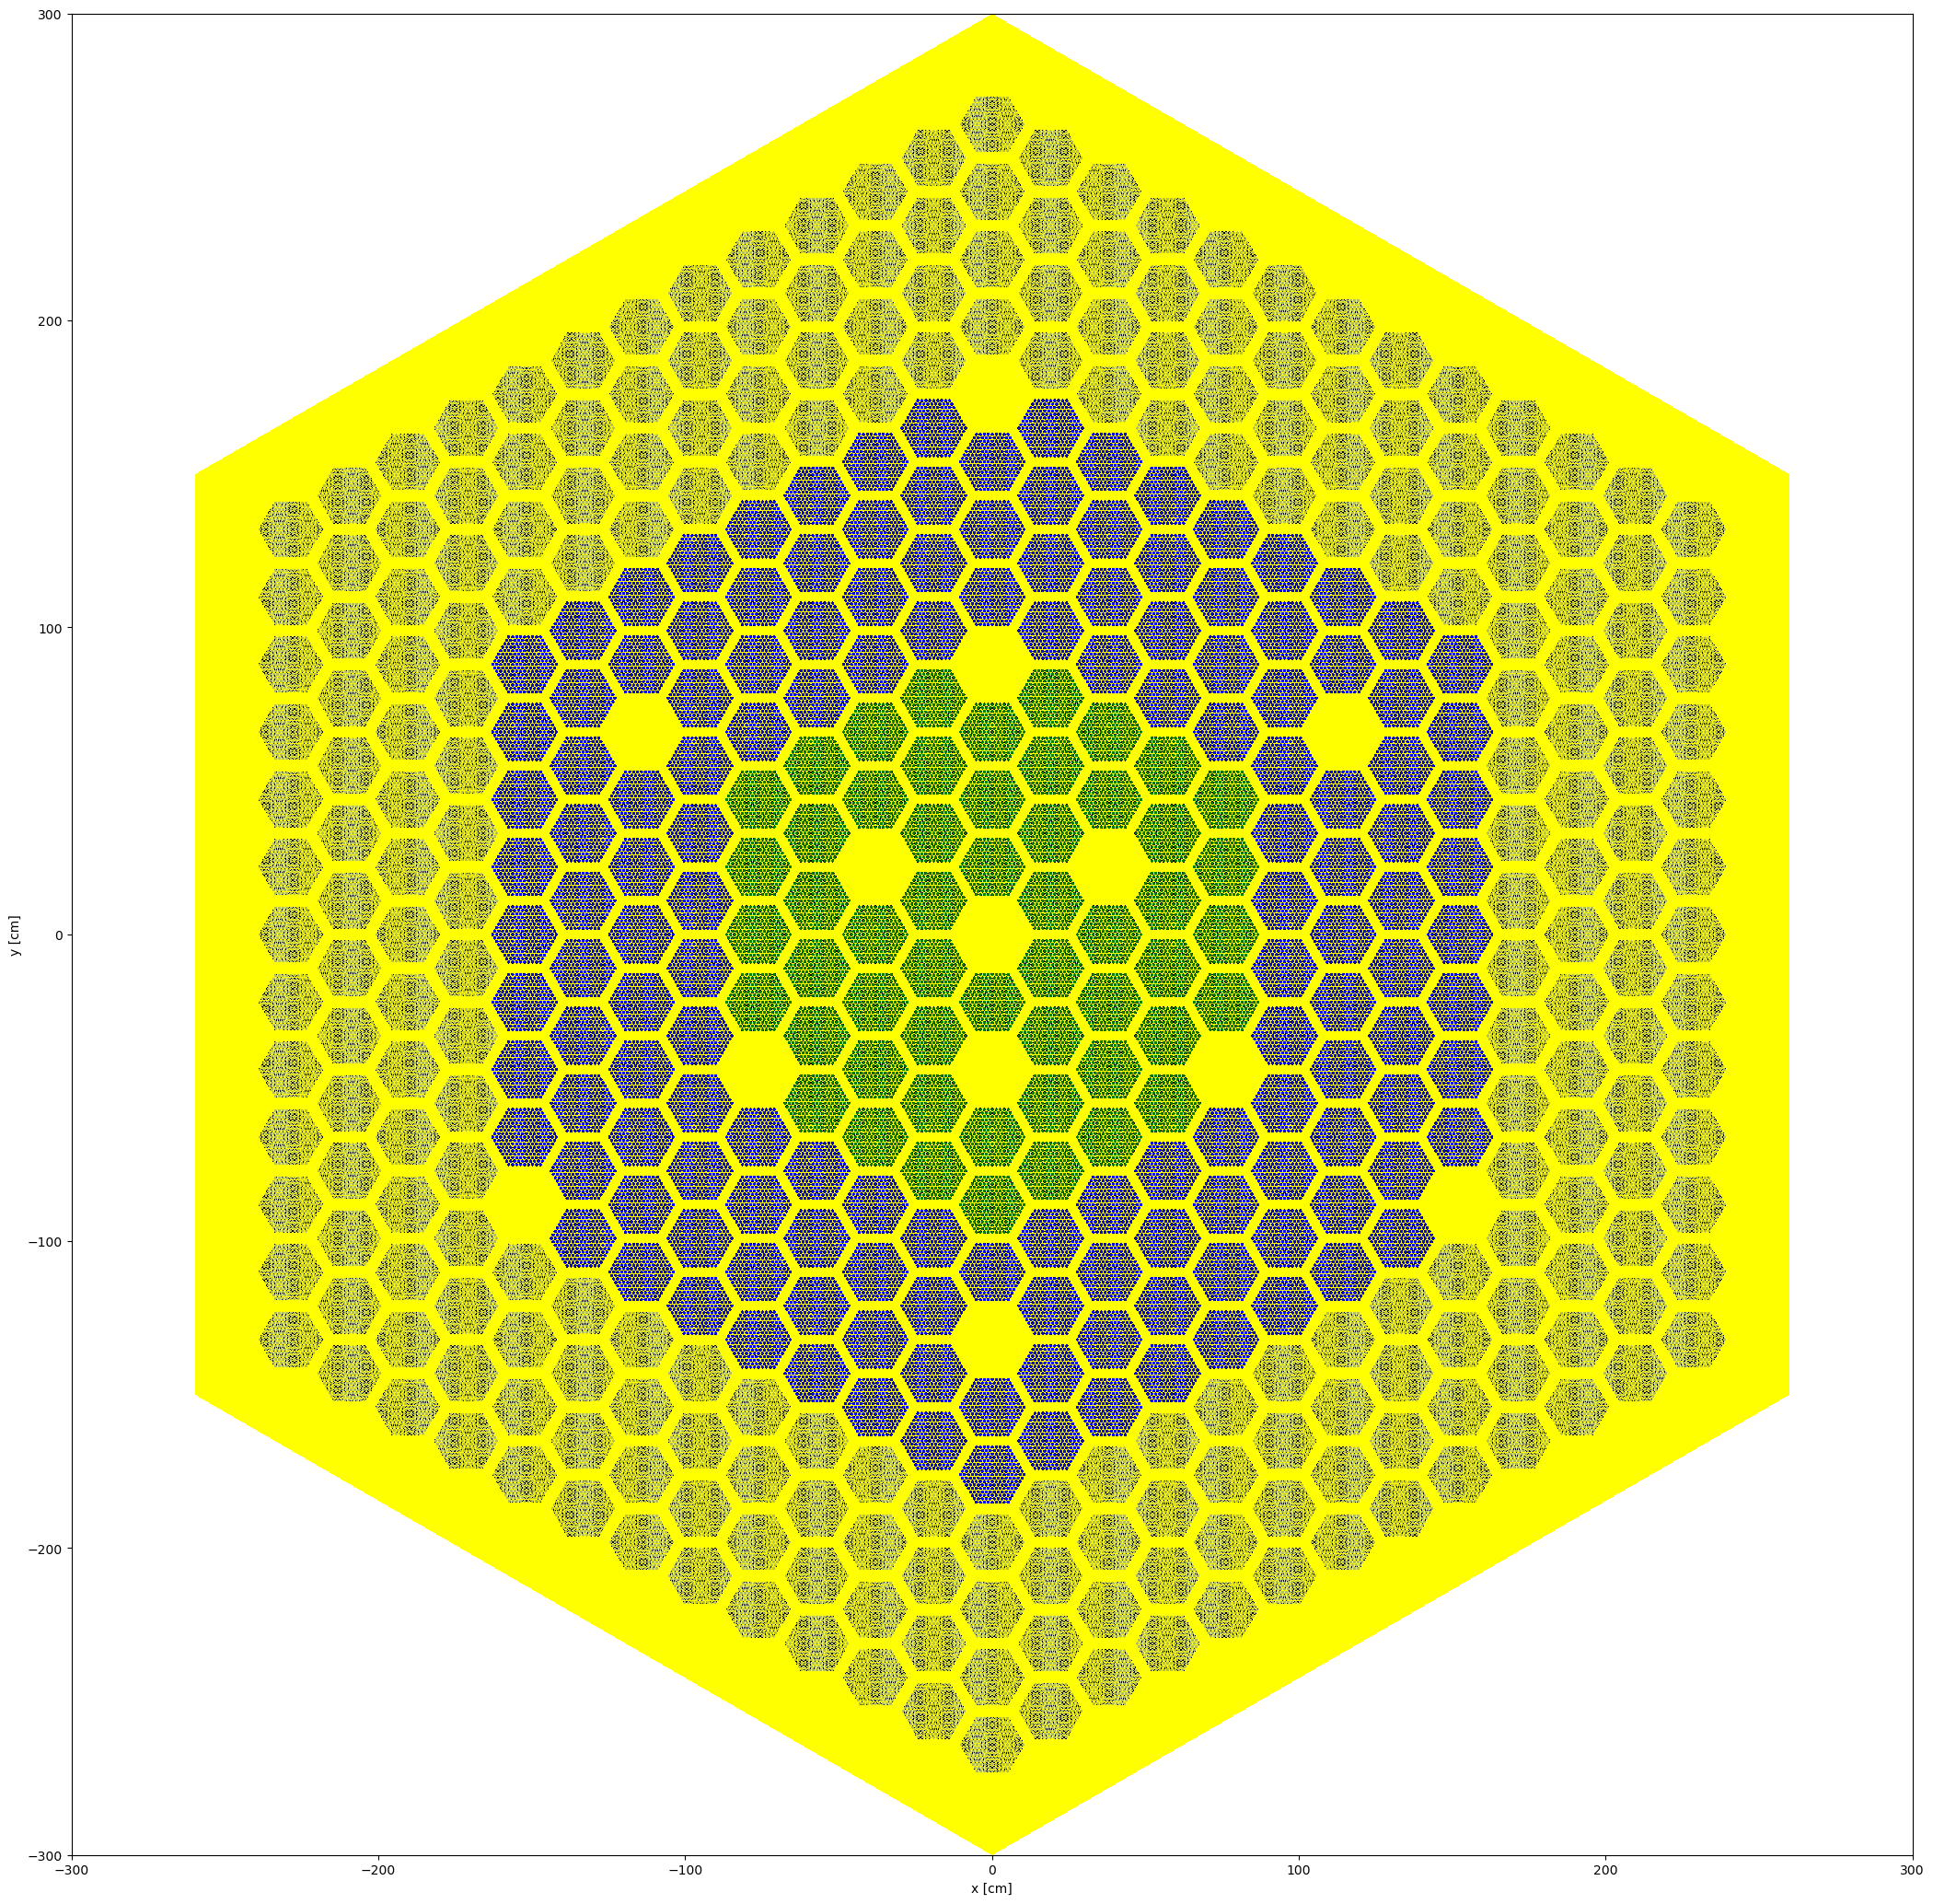

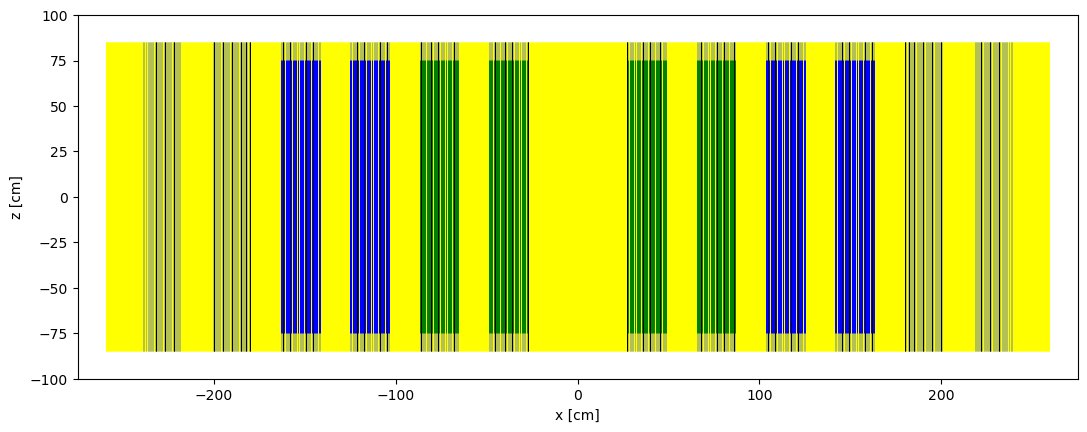

In [19]:
#fast core 
fastcore_lat = openmc.HexLattice(name='fast core')
fastcore_lat.center = (0., 0.)
fastcore_lat.pitch = (22,)
fastcore_lat.outer = coolant_u

fc13 = [blanket_ass_u]*72
fc12 = [blanket_ass_u]*66
fc11 = [blanket_ass_u]*60
fc10 = [blanket_ass_u]*54
fc9 = ([fast_blank_u]+[outerfast_ass_u]*15 + [fast_blank_u] + [outerfast_ass_u]*15 + [fast_blank_u] + [outerfast_ass_u]*15)
fc8 = [outerfast_ass_u]*42
fc7 = ([outerfast_ass_u]*6+[fast_blank_u] + [outerfast_ass_u]*11 +[fast_blank_u]+ [outerfast_ass_u]*11+[fast_blank_u]+[outerfast_ass_u]*5)
fc6 = [outerfast_ass_u]*30
fc5 = ([fast_blank_u]+[infast_ass_u]*7 + [fast_blank_u]+[infast_ass_u]*7 + [fast_blank_u]+[infast_ass_u]*7)
fc4 = [infast_ass_u]*18
fc3 = ([infast_ass_u]+[infast_ass_u]+[fast_blank_u] + [infast_ass_u]*3 +[fast_blank_u]+ [infast_ass_u]*3+[fast_blank_u] +[infast_ass_u] )
fc2 = [infast_ass_u]*6
fc1 = [fast_blank_u]*1
fastcore_lat.universes = [fc13,fc12,fc11,fc10,fc9,fc8,fc7,fc6,fc5,fc4,fc3,fc2,fc1]

fastcore_boundary = openmc.model.hexagonal_prism(edge_length=300,boundary_type='vacuum')

fastcore = openmc.Cell(fill=fastcore_lat, region=fastcore_boundary & -breeder_barrier_top & +breeder_barrier_bottom)

fastcore_out = openmc.Cell(region=~fastcore_boundary & -breeder_barrier_top & +breeder_barrier_bottom)

fastcore_u = openmc.Universe(cells=[fastcore, fastcore_out]) 

img1 = fastcore_u.plot(origin = (0,0,0), pixels=(2000, 2000), width = (600.,600.), color_by = 'material',colors=mat_colors)
img2 = fastcore_u.plot(origin = (0,0,0), pixels=(1000, 1000), width = (550.,200.), color_by = 'material',colors=mat_colors,basis = 'xz')

In [20]:
geom = openmc.Geometry(fastcore_u)
geom.export_to_xml()

In [21]:
# OpenMC simulation parameters

lower_left = [-300, -300, -85]
upper_right = [300, 300, 85]
uniform_dist = openmc.stats.Box(lower_left, upper_right)
src = openmc.Source(space=uniform_dist)

settings = openmc.Settings()
settings.source = src
settings.batches = 100
settings.generations_per_batch = 3
settings.inactive = 10
settings.particles = 10000

settings.export_to_xml()

/home/hridoy/miniconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/source.py:658: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


In [22]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################